<a href="https://colab.research.google.com/github/fredffsixty/Natural_Language_Processing/blob/main/visualizing_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import nltk
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root = "/content/gdrive/MyDrive/Colab Notebooks/torch/"

# https://github.com/stanfordnlp/GloVe

def load_glove():
    glove_path = root+"wordvectors/glove.6B.300d.txt"
    print("Loading glove vectors ...")
    with open(glove_path, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        glove_embeddings = {line[0]: np.array(list(map(float, line[1:])))
                for line in reader}
    print("Glove vectors loaded")
    return glove_embeddings

In [ ]:
glove_embeddings = load_glove()

Loading glove vectors ...
Glove vectors loaded


In [ ]:
## To find the nearest neighbors of a word
def find_nearest(word, glove_embeddings, k=5):
  distances = []
  word_vec = glove_embeddings[word]
  for w, vec in glove_embeddings.items():
    distance = np.linalg.norm(word_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:k]

print(find_nearest('cat', glove_embeddings))
print(find_nearest('water', glove_embeddings))

[('cat', 0.0), ('cats', 5.05374343410542), ('dog', 5.195904648012852), ('pet', 5.861308244916757), ('feline', 6.099418885456145)]
[('water', 0.0), ('drinking', 6.312944591548733), ('seawater', 6.570764800332372), ('potable', 6.673485737303555), ('supply', 6.685510937865386)]


In [ ]:
## To find the analogy between words
def find_analogy(a, b, c, glove_embeddings):
  a_vec = glove_embeddings[a]
  b_vec = glove_embeddings[b]
  c_vec = glove_embeddings[c]
  d_vec = b_vec - a_vec + c_vec
  distances = []
  for w, vec in glove_embeddings.items():
    distance = np.linalg.norm(d_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:1]

#print(find_analogy('king', 'man', 'queen', glove_embeddings))
#print(find_analogy('paris', 'france', 'rome', glove_embeddings))
print(find_analogy('woman', 'actress', 'man', glove_embeddings))
print(find_analogy('pianist', 'piano', 'guitarist', glove_embeddings))

[('actor', 4.416906856726949)]
[('guitar', 4.915512940288011)]


In [ ]:
words = ['woman', 'actress', 'man', 'actor', 'pianist',
         'piano', 'guitarist', 'guitar']

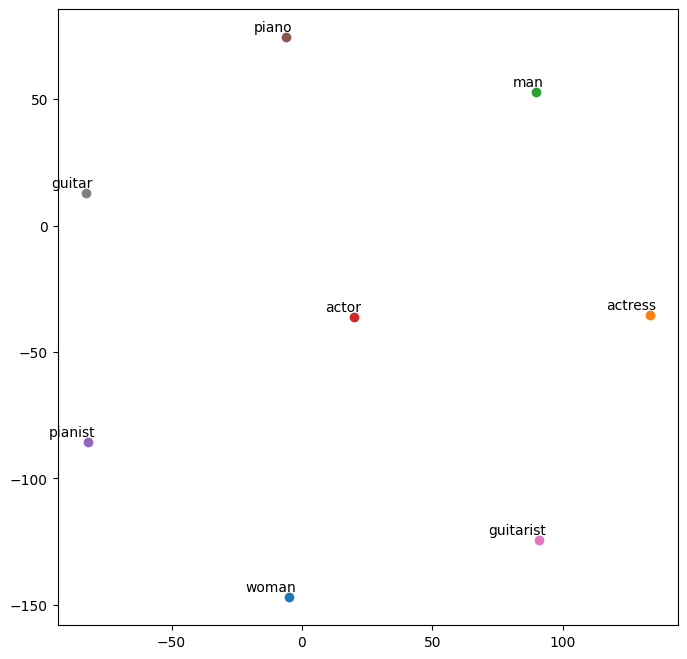

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2),
                     textcoords="offset points", ha="right", va="bottom")
    plt.show()

glove_words = [word for word in words if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

In [ ]:
from nltk.corpus import brown
nltk.download('brown')
categories = brown.categories()
print(categories)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [ ]:
words_brown = brown.words(categories=categories)
len(words_brown)

1161192

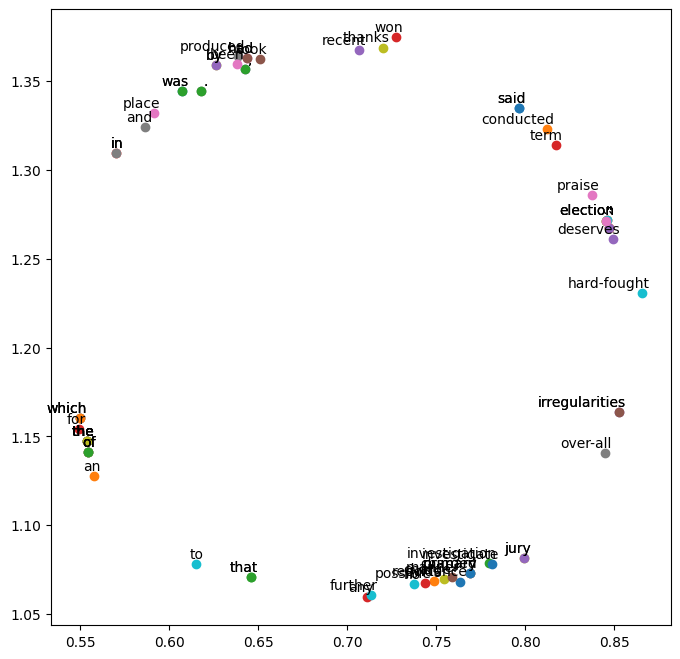

In [ ]:
glove_words = [word for word in words_brown[:100] if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)